In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore the harmless warnings
import warnings
warnings.filterwarnings('ignore')

#set to display all cols in dataset
pd.set_option('display.max_columns',None)
traindata1 = pd.read_csv("/content/dt.csv")
print(traindata1)
traindata2=traindata1.copy()
traindata1.head(5)




     Movie Title    Budget  Viewer Ratings  Duration  Release Year   Genre
0         Movie1  22081788             4.4       128          1992  Horror
1         Movie2  14315092             6.6       150          2008  Comedy
2         Movie3  36788921             5.5        80          1991  Action
3         Movie4  27735830             8.7       175          2018   Drama
4         Movie5  49140618             6.9        92          1981  Horror
...          ...       ...             ...       ...           ...     ...
1995   Movie1996  34843222             9.6       110          2015  Comedy
1996   Movie1997   6084921             2.3       161          2009  Horror
1997   Movie1998  28810313             4.7       179          1997  Horror
1998   Movie1999  44351876             1.8        81          1981  Comedy
1999   Movie2000  47787763            10.0       157          1992  Comedy

[2000 rows x 6 columns]


,Movie Title,Budget,Viewer Ratings,Duration,Release Year,Genre
0,Movie1,22081788,4.4,128,1992,Horror
1,Movie2,14315092,6.6,150,2008,Comedy
2,Movie3,36788921,5.5,80,1991,Action
3,Movie4,27735830,8.7,175,2018,Drama
4,Movie5,49140618,6.9,92,1981,Horror


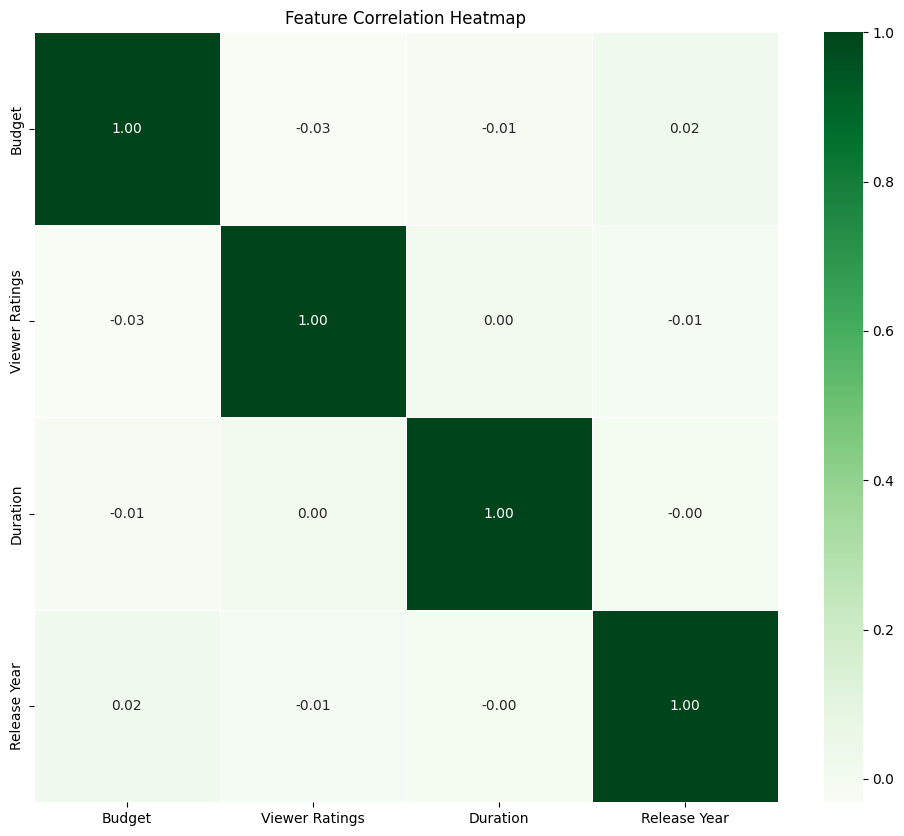

In [ ]:
# Compute the correlation matrix
correlation_matrix = traindata2.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

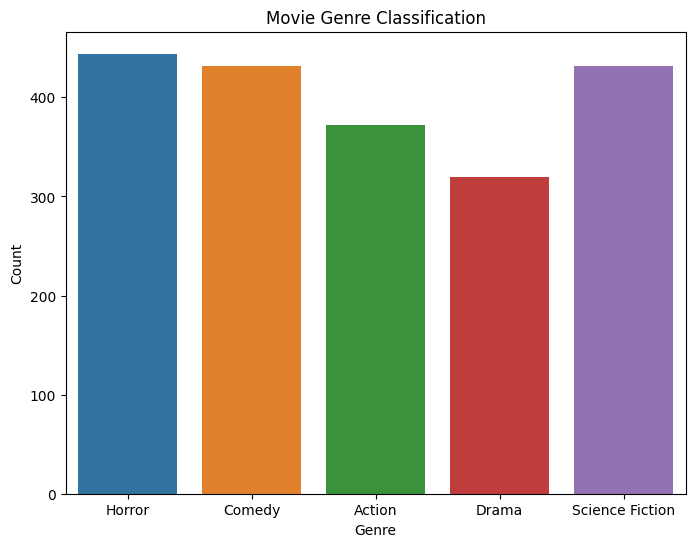

In [ ]:
# Create a count plot for income distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=traindata2,x='Genre')
plt.title("Movie Genre Classification")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [ ]:
traindata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie Title     2000 non-null   object 
 1   Budget          2000 non-null   int64  
 2   Viewer Ratings  2000 non-null   float64
 3   Duration        2000 non-null   int64  
 4   Release Year    2000 non-null   int64  
 5   Genre           2000 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 93.9+ KB


In [ ]:
traindata2.shape

(2000, 6)

In [ ]:
traindata2.describe()

,Budget,Viewer Ratings,Duration,Release Year
count,2.000000e+03,2000.000000,2000.000000,2000.00000
mean,2.549644e+07,5.522600,129.550000,2000.53200
std,1.420825e+07,2.649796,29.302574,12.07849
min,1.048984e+06,1.000000,80.000000,1980.00000
25%,1.317289e+07,3.200000,104.750000,1991.00000
50%,2.520038e+07,5.500000,128.000000,2000.00000
75%,3.746492e+07,7.825000,155.250000,2011.00000
max,4.993958e+07,10.000000,179.000000,2022.00000


In [ ]:
traindata2.dtypes

Movie Title        object
Budget              int64
Viewer Ratings    float64
Duration            int64
Release Year        int64
Genre              object
dtype: object

In [ ]:
traindata2[traindata2.duplicated(keep='first')]

,Movie Title,Budget,Viewer Ratings,Duration,Release Year,Genre


In [ ]:
traindata2=traindata2.drop_duplicates(keep='first')
traindata2.reset_index(inplace=True)

In [ ]:
traindata2.isnull().sum()

index             0
Movie Title       0
Budget            0
Viewer Ratings    0
Duration          0
Release Year      0
Genre             0
dtype: int64

In [ ]:

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cols=['Movie Title','Genre']
for col in cols:
  traindata2[col]=le.fit_transform(traindata2[col])

In [ ]:
X=traindata2.iloc[:,:-1]
y=traindata2.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=42)

# Display size of train and test sets
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1400, 6), (600, 6), (1400,), (600,))

In [ ]:
# Scaling the features using mimmax scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

x_train=sc.fit_transform(x_train)

x_test=sc.fit_transform(x_test)

In [ ]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=15)
ModelGNB = GaussianNB()

MM = [ModelLR, ModelDC, ModelKNN, ModelGNB]

for models in MM:

    # Train the model training dataset

    models.fit(x_train, y_train)

    # Prediction the model with test dataset

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)



    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    #accuracy score
    ac_score=accuracy_score(actual,predicted)
    print("Accuracy of the model: ",ac_score)
    print("<========================================================>")

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=15)
ModelGNB = GaussianNB()

MM = [ModelLR, ModelDC, ModelKNN, ModelGNB]

for models in MM:

    # Train the model training dataset

    models.fit(x_train, y_train)

    # Prediction the model with test dataset

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)



    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    #accuracy score
    ac_score=accuracy_score(actual,predicted)
    print("Accuracy of the model: ",ac_score)
    print("<========================================================>")

Model Name:  LogisticRegression()
Confusion matrix : 
 [[48 23]
 [41  7]]
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.37      0.29       129
           0       0.12      0.06      0.08       116

   micro avg       0.21      0.22      0.22       245
   macro avg       0.18      0.22      0.19       245
weighted avg       0.18      0.22      0.19       245

Accuracy of the model:  0.20333333333333334
<========================================================>
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[120   1]
 [  2 104]]
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.93      0.91       129
           0       0.95      0.90      0.92       116

   micro avg       0.91      0.91      0.91       245
   macro avg       0.92      0.91      0.92       245
weighted avg       0.92      0.91      0.91       245

Accuracy of the model:  0.91
<=====